<a href="https://colab.research.google.com/github/hoanghoc/CNN/blob/main/CNNRecognizeHandwri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This experiment guided how to train and predict handwritten digit with CNN. 
# We have used a simple CNN with 8 layers, MNIST dataset also employed to estimate the performance of our model.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 Conv2 (Conv2D)              (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 Dense (Dense)               (None, 1024)             

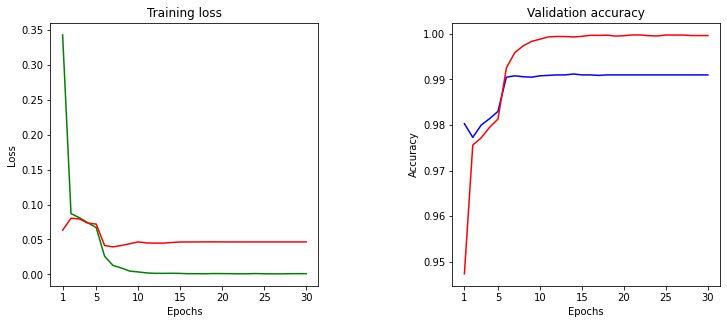

In [4]:
from matplotlib import axes
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from PIL import Image

from keras import callbacks

import os
import subprocess



(x_train, y_train), (x_test,y_test)=mnist.load_data()

#print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
model=keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),filters=32,kernel_size=5,
    strides=1,activation='relu',padding='same',name='Conv1'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
    keras.layers.Conv2D(filters=64,kernel_size=5,
    strides=1,activation='relu',padding='same',name='Conv2'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,name='Dense', activation='relu'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(10),
    #keras.layers.Softmax()
])

model.summary()
testing=False
epochs=10
initial_lr=0.001
step=10000
rate=0.1
staircase=True
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=step,
    decay_rate=rate,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

class PerformancePlotCallback(keras.callbacks.Callback):
    def __init__(self, x_test, y_test):
        self.x_test = x_test
        self.y_test = y_test
        self.loss_train=None
        self.acc_test=None
        
    def on_epoch_end(self, epoch, logs=None):
        #y_pred = self.model.predict(self.x_test)
        #print(y_pred)
        #self.loss_train.append([logs["loss"]])
       # self.acc_test.append([logs["val_sparse_categorical_accuracy"]])
        #print(self.loss_train)
        #acc_val=[logs["val_sparse_categorical_accuracy"]]
        #if epoch==20:
          #x1=[i for i in range(epoch)]
          #plt.plot(x1,self.loss_train)
          #plt.plot(x1,self.acc_test)   
          #plt.show()
        pass

  
history = model.fit(x_train,y_train, batch_size =30, 
                    epochs =30, validation_data =(x_test, y_test), 
                    callbacks = [PerformancePlotCallback(x_test,y_test)])
#history_dict = history.history
#print(history_dict.keys()) 
loss_train = history.history['loss']
loss_val=history.history['val_loss']
acc_val = history.history['val_sparse_categorical_accuracy']
acc_train=history.history['sparse_categorical_accuracy']
epochs = range(1,31)

fig, axs = plt.subplots(1,2,figsize=(12,5))
ax1, ax2 = axs.flat
ax1.set_xticks((1,5,10,15,20,25,30))
ax1.plot(epochs, loss_train, 'g', label='Training and Validation loss')
ax1.plot(epochs,loss_val,'r')
ax1.set_title('Training loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
#plt.legend()


ax2.set_xticks((1,5,10,15,20,25,30))
ax2.plot(epochs, acc_val, 'b', label='Training and Validation accuracy')
ax2.plot(epochs, acc_train, 'r')
ax2.set_title('Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

plt.subplots_adjust(bottom=0.15, wspace=0.5)
plt.show()
